<a href="https://colab.research.google.com/github/Rogerod23/Rogelio/blob/main/age_PDFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

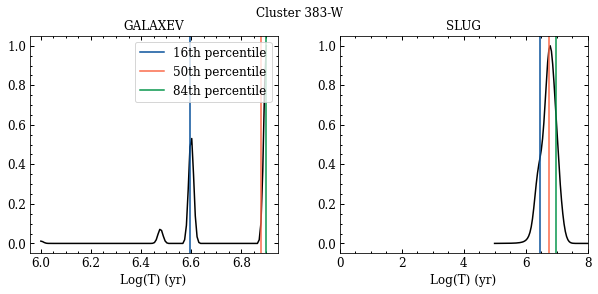

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
### THIS NOTEBOOK ONLY PLOTS CLUSTERS 2732 and 816.

#############################
#### LOAD DATA   ############
#############################
PDF = pd.read_csv("https://raw.githubusercontent.com/Rogerod23/Rogelio/main/PDF.csv")
percentiles = pd.read_csv("https://raw.githubusercontent.com/Rogerod23/Rogelio/main/percentiles_all.csv")

del PDF["Unnamed: 0"]
del percentiles["Unnamed: 0"]


cluster_list = ["11-E", "90-E", "93-E", "383-W", "417-W", "451-W", "531-E", "534-E",
                "589-E", "816-E", "894-E", "1252-W", "1381-W", "1564-W", "1576-W",
                "1949-W", "2449-W", "2732-W", "2740-W"]

PDF_columns = PDF.columns
percentiles_columns = percentiles.columns

# Getting name of the age_pdf of cb2018
a = np.where(PDF_columns.str.contains("tpdf_cb2018") == True)
age_CB2018 = PDF_columns[a]


a = np.where(percentiles_columns.str.contains("cb2018") == True)
percentiles_CB2018 = percentiles_columns[a]

a = np.where(percentiles_CB2018.str.contains("t_") == True)
percentiles_CB2018 = percentiles_CB2018[a]



# Getting name of the age_pdf of Krumholz2015
a = np.where(PDF_columns.str.contains("tpdf_modp020") == True)
age_Krumholz2015 = PDF_columns[a]

a = np.where(percentiles_columns.str.contains("modp020") == True)
percentiles_Krumholz2015 = percentiles_columns[a]

a = np.where(percentiles_Krumholz2015.str.contains("t_") == True)
percentiles_Krumholz2015 = percentiles_Krumholz2015[a]



#PDF COLUMN INFO TO SEE WHAT PLOT YOU WANT TO SEE
#print(percentiles_columns)
#print(PDF_columns)

#########################################################
# Colors 
#########################################################

alpha=1
blue=(7/255,80/255,155/255,alpha)
lblue=(106/255,175/255,210/255,alpha)
pistache=(190/255,250/255,215/255,alpha)
yellow=(248/255,250/255,3/255,alpha)
red=(251/255,105/255,73/255,alpha)
wine=(160/255,55/255,98/255,alpha)
dgreen=(5/255,149/255,74/255,alpha)
gray=(203/255,202/255,201/255,alpha)
black = (0,0,0,1)

mycolor=[blue,red,dgreen]

#########################################################
# Font parameters 
#########################################################
fontsize=12
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : fontsize}
plt.rc('font', **font)

mycolor=[blue,red,dgreen]

mark = "None"
lw_ = 1.5
linestyle_ = "-"

#Figure size and subplots
i = 0
for CB2018, K2015 in zip(age_CB2018, age_Krumholz2015):
#get cluster ID
  if len(CB2018) == 25:
    cid = CB2018[22:25]
  else:
    cid = CB2018[22:26]
#Get percentiles column name
  percentile_16th_CB2018 = "t_16th_cb2018_z014_u3_{}".format(cid)
  percentile_50th_CB2018 = "t_50th_cb2018_z014_u3_{}".format(cid)
  precentile_84th_CB2018 = "t_84th_cb2018_z014_u3_{}".format(cid)


  percentile_16th_KRUM2015 = "t_16th_modp020_chabrier_MW_phi0.50_{}".format(cid)
  percentile_50th_KRUM2015 = "t_50th_modp020_chabrier_MW_phi0.50_{}".format(cid)
  precentile_84th_KRUM2015 = "t_84th_modp020_chabrier_MW_phi0.50_{}".format(cid)
  fig, axes = plt.subplots(1,2,figsize=(10,4))

  plt.subplots_adjust(hspace=0.5)
  plt.subplots_adjust(wspace=0.25)
  code=['GALAXEV','SLUG']
#figure title
  for c in cluster_list:
    if cid == c[0:2]:
      fig.suptitle('Cluster {}'.format(c), size = 12)
    elif cid == c[0:3]:
      fig.suptitle('Cluster {}'.format(c), size = 12)
    elif cid == c[0:4]:
      fig.suptitle('Cluster {}'.format(c), size = 12)


  for icode in range(2):
      axes[icode].set_ylabel('')
      axes[icode].minorticks_on() #...add minor ticks to x and y axes
      axes[icode].tick_params(which='minor', length = 2, width = 1, #...format minor ticks
                                      direction = 'in', top = True, right = True)
      axes[icode].tick_params(which='major', length = 4, width = 1, #...format minor ticks  
                                        direction = 'in', top = True, right = True)
  #    if icode==0 and icluster == 0:
  #        axes[icluster][icode].annotate('Cluster 816-E', 
  #                                        xy = (0.4,0.95), xytext = (0.4,0.95), 
  #                                        xycoords='figure fraction', size = 12)
  #    if icode==0 and icluster == 1:
  #        axes[icluster][icode].annotate('Cluster 2732-W', 
  #                                        xy = (0.4,0.47), xytext = (0.4,0.47), 
  #                                        xycoords='figure fraction', size = 12)            
      axes[icode].set_xlabel('Log(T) (yr)')
      
  axes[0].set_title(code[0],fontsize=12)
  axes[1].set_title(code[1],fontsize=12)
  axes[1].set_xlim(0, 8)


  #Extinction plots



  axes[0].plot(PDF.loc[:, PDF_columns[2]], PDF.loc[:, CB2018]/PDF.loc[:, CB2018].max(), color = black, marker = mark, 
          markevery= 10, linestyle = linestyle_, lw=lw_)

  axes[1].plot(PDF.loc[:, PDF_columns[6]], PDF.loc[:, K2015]/PDF.loc[:, K2015].max(), color = black, marker = mark, 
          markevery= 10, linestyle = linestyle_, lw=lw_)
  

  axes[0].axvline(percentiles.loc[0, percentile_16th_CB2018], 
                   color =mycolor[0], linestyle = '-', linewidth = lw_,label='16th percentile')
  axes[0].axvline(percentiles.loc[0, percentile_50th_CB2018], color =mycolor[1],
                   linestyle =  '-', linewidth = lw_,label='50th percentile')
  axes[0].axvline(percentiles.loc[0, precentile_84th_CB2018], color =mycolor[2],
                   linestyle =  '-', linewidth = lw_,label='84th percentile')
  axes[0].legend(loc = "upper right")

  axes[1].axvline(percentiles.loc[0, percentile_16th_KRUM2015], 
                   color =mycolor[0], linestyle = '-', linewidth = lw_,label='16th percentile')
  axes[1].axvline(percentiles.loc[0, percentile_50th_KRUM2015], color =mycolor[1],
                   linestyle =  '-', linewidth = lw_,label='50th percentile')
  axes[1].axvline(percentiles.loc[0, precentile_84th_KRUM2015], color =mycolor[2],
                   linestyle =  '-', linewidth = lw_,label='84th percentile')


  if len(CB2018) == 25:

    plt.savefig("age_pdf_{}.png".format(CB2018[20:25]), bbox_inches = 'tight',dpi=100)
  else:
    plt.savefig("age_pdf_{}.png".format(CB2018[20:26]), bbox_inches = 'tight',dpi=100)
  if i == 0:
    plt.show()
  plt.close()
  i += 1



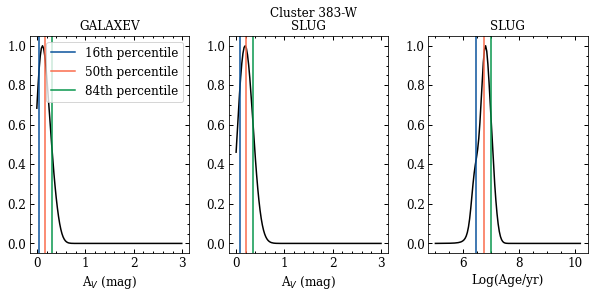

In [ ]:
#Routine to make extinction + age plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
### THIS NOTEBOOK ONLY PLOTS CLUSTERS 2732 and 816.

#############################
#### LOAD DATA   ############
#############################
PDF = pd.read_csv("https://raw.githubusercontent.com/Rogerod23/Rogelio/main/PDF.csv")
percentiles = pd.read_csv("https://raw.githubusercontent.com/Rogerod23/Rogelio/main/percentiles_all.csv")

del PDF["Unnamed: 0"]
del percentiles["Unnamed: 0"]


cluster_list = ["11-E", "90-E", "93-E", "383-W", "417-W", "451-W", "531-E", "534-E",
                "589-E", "816-E", "894-E", "1252-W", "1381-W", "1564-W", "1576-W",
                "1949-W", "2449-W", "2732-W", "2740-W"]

PDF_columns = PDF.columns
percentiles_columns = percentiles.columns

# Getting name of the age_pdf of cb2018
a = np.where(PDF_columns.str.contains("AVpdf_cb2018") == True)
ext_CB2018 = PDF_columns[a]


a = np.where(percentiles_columns.str.contains("cb2018") == True)
percentiles_CB2018 = percentiles_columns[a]

a = np.where(percentiles_CB2018.str.contains("AV_") == True)
percentiles_CB2018 = percentiles_CB2018[a]




# Getting name of the age_pdf of Krumholz2015
a = np.where(PDF_columns.str.contains("AVpdf_modp020") == True)
ext_Krumholz2015 = PDF_columns[a]

a = np.where(percentiles_columns.str.contains("modp020") == True)
percentiles_Krumholz2015 = percentiles_columns[a]

a = np.where(percentiles_Krumholz2015.str.contains("AV_") == True)
percentiles_Krumholz2015 = percentiles_Krumholz2015[a]


# Getting name of the age_pdf of Krumholz2015
a = np.where(PDF_columns.str.contains("tpdf_modp020") == True)
age_Krumholz2015 = PDF_columns[a]

a = np.where(percentiles_columns.str.contains("modp020") == True)
percentiles_Krumholz2015_age = percentiles_columns[a]

a = np.where(percentiles_Krumholz2015_age.str.contains("t_") == True)
percentiles_Krumholz2015_age = percentiles_Krumholz2015_age[a]


#PDF COLUMN INFO TO SEE WHAT PLOT YOU WANT TO SEE
#print(percentiles_columns)
#print(PDF_columns)

#########################################################
# Colors 
#########################################################

alpha=1
blue=(7/255,80/255,155/255,alpha)
lblue=(106/255,175/255,210/255,alpha)
pistache=(190/255,250/255,215/255,alpha)
yellow=(248/255,250/255,3/255,alpha)
red=(251/255,105/255,73/255,alpha)
wine=(160/255,55/255,98/255,alpha)
dgreen=(5/255,149/255,74/255,alpha)
gray=(203/255,202/255,201/255,alpha)
black = (0,0,0,1)

mycolor=[blue,red,dgreen]

#########################################################
# Font parameters 
#########################################################
fontsize=12
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : fontsize}
plt.rc('font', **font)

mycolor=[blue,red,dgreen]

mark = "None"
lw_ = 1.5
linestyle_ = "-"

#Figure size and subplots
i = 0
for CB2018, K2015, K2015_age in zip(ext_CB2018, ext_Krumholz2015, age_Krumholz2015):
#get cluster ID
  if len(CB2018) == 26:
    cid = CB2018[23:26]
  else:
    cid = CB2018[23:27]
#Get percentiles column name
  percentile_16th_CB2018 = "AV_16th_cb2018_z014_u3_{}".format(cid)
  percentile_50th_CB2018 = "AV_50th_cb2018_z014_u3_{}".format(cid)
  precentile_84th_CB2018 = "AV_84th_cb2018_z014_u3_{}".format(cid)


  percentile_16th_KRUM2015 = "AV_16th_modp020_chabrier_MW_phi0.50_{}".format(cid)
  percentile_50th_KRUM2015 = "AV_50th_modp020_chabrier_MW_phi0.50_{}".format(cid)
  precentile_84th_KRUM2015 = "AV_84th_modp020_chabrier_MW_phi0.50_{}".format(cid)

  percentile_16th_KRUM2015_age = "t_16th_modp020_chabrier_MW_phi0.50_{}".format(cid)
  percentile_50th_KRUM2015_age = "t_50th_modp020_chabrier_MW_phi0.50_{}".format(cid)
  precentile_84th_KRUM2015_age = "t_84th_modp020_chabrier_MW_phi0.50_{}".format(cid)
  fig, axes = plt.subplots(1,3,figsize=(10,4))

  plt.subplots_adjust(hspace=0.5)
  plt.subplots_adjust(wspace=0.25)
  code=['GALAXEV','SLUG']
#figure title
  for c in cluster_list:
    if cid == c[0:2]:
      fig.suptitle('Cluster {}'.format(c), size = 12)
    elif cid == c[0:3]:
      fig.suptitle('Cluster {}'.format(c),  x = 0.52, size = 12)
    elif cid == c[0:4]:
      fig.suptitle('Cluster {}'.format(c), size = 12)


  for icode in range(3):
      axes[icode].set_ylabel('')
      axes[icode].minorticks_on() #...add minor ticks to x and y axes
      axes[icode].tick_params(which='minor', length = 2, width = 1, #...format minor ticks
                                      direction = 'in', top = True, right = True)
      axes[icode].tick_params(which='major', length = 4, width = 1, #...format minor ticks  
                                        direction = 'in', top = True, right = True)
  #    if icode==0 and icluster == 0:
  #        axes[icluster][icode].annotate('Cluster 816-E', 
  #                                        xy = (0.4,0.95), xytext = (0.4,0.95), 
  #                                        xycoords='figure fraction', size = 12)
  #    if icode==0 and icluster == 1:
  #        axes[icluster][icode].annotate('Cluster 2732-W', 
  #                                        xy = (0.4,0.47), xytext = (0.4,0.47), 
  #                                        xycoords='figure fraction', size = 12)

      if icode == 2:
        axes[icode].set_xlabel('Log(Age/yr)')
      else:          
        axes[icode].set_xlabel(r'A$_{V}$ (mag)')
      
  axes[0].set_title(code[0],fontsize=12)
  axes[1].set_title(code[1],fontsize=12)
  axes[2].set_title(code[1],fontsize=12)
  


  #Extinction plots



  axes[0].plot(PDF.loc[:, PDF_columns[0]], PDF.loc[:, CB2018]/PDF.loc[:, CB2018].max(), color = black, marker = mark, 
          markevery= 10, linestyle = linestyle_, lw=lw_)

  axes[1].plot(PDF.loc[:, PDF_columns[4]], PDF.loc[:, K2015]/PDF.loc[:, K2015].max(), color = black, marker = mark, 
          markevery= 10, linestyle = linestyle_, lw=lw_)
  
  axes[2].plot(PDF.loc[:, PDF_columns[6]], PDF.loc[:, K2015_age]/PDF.loc[:, K2015_age].max(), color = black, marker = mark, 
          markevery= 10, linestyle = linestyle_, lw=lw_)
  

  axes[0].axvline(percentiles.loc[0, percentile_16th_CB2018], 
                   color =mycolor[0], linestyle = '-', linewidth = lw_,label='16th percentile')
  axes[0].axvline(percentiles.loc[0, percentile_50th_CB2018], color =mycolor[1],
                   linestyle =  '-', linewidth = lw_,label='50th percentile')
  axes[0].axvline(percentiles.loc[0, precentile_84th_CB2018], color =mycolor[2],
                   linestyle =  '-', linewidth = lw_,label='84th percentile')
  axes[0].legend(loc = "upper right")

  axes[1].axvline(percentiles.loc[0, percentile_16th_KRUM2015], 
                   color =mycolor[0], linestyle = '-', linewidth = lw_,label='16th percentile')
  axes[1].axvline(percentiles.loc[0, percentile_50th_KRUM2015], color =mycolor[1],
                   linestyle =  '-', linewidth = lw_,label='50th percentile')
  axes[1].axvline(percentiles.loc[0, precentile_84th_KRUM2015], color =mycolor[2],
                   linestyle =  '-', linewidth = lw_,label='84th percentile')
  

  axes[2].axvline(percentiles.loc[0, percentile_16th_KRUM2015_age], 
                   color =mycolor[0], linestyle = '-', linewidth = lw_,label='16th percentile')
  axes[2].axvline(percentiles.loc[0, percentile_50th_KRUM2015_age], color =mycolor[1],
                   linestyle =  '-', linewidth = lw_,label='50th percentile')
  axes[2].axvline(percentiles.loc[0, precentile_84th_KRUM2015_age], color =mycolor[2],
                   linestyle =  '-', linewidth = lw_,label='84th percentile')


  if len(CB2018) == 25:
    plt.savefig("ext_pdf_{}.png".format(CB2018[20:25]), bbox_inches = 'tight',dpi=100)
  else:
   plt.savefig("ext_pdf_{}.png".format(CB2018[20:26]), bbox_inches = 'tight',dpi=100)
  if i == 0:
    plt.show()
  plt.close()
  i += 1


In [15]:
c[0:2]

'27'

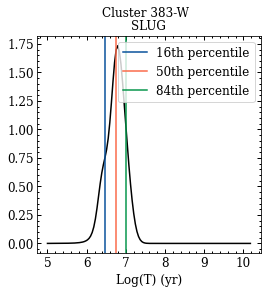

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
### THIS NOTEBOOK ONLY PLOTS CLUSTERS 2732 and 816.

#############################
#### LOAD DATA   ############
#############################
PDF = pd.read_csv("https://raw.githubusercontent.com/Rogerod23/Rogelio/main/PDF.csv")
percentiles = pd.read_csv("https://raw.githubusercontent.com/Rogerod23/Rogelio/main/percentiles_all.csv")

del PDF["Unnamed: 0"]
del percentiles["Unnamed: 0"]


cluster_list = ["11-E", "90-E", "93-E", "383-W", "417-W", "451-W", "531-E", "534-E",
                "589-E", "816-E", "894-E", "1252-W", "1381-W", "1564-W", "1576-W",
                "1949-W", "2449-W", "2732-W", "2740-W"]

PDF_columns = PDF.columns
percentiles_columns = percentiles.columns

# Getting name of the age_pdf of cb2018
a = np.where(PDF_columns.str.contains("tpdf_cb2018") == True)
age_CB2018 = PDF_columns[a]


a = np.where(percentiles_columns.str.contains("cb2018") == True)
percentiles_CB2018 = percentiles_columns[a]

a = np.where(percentiles_CB2018.str.contains("t_") == True)
percentiles_CB2018 = percentiles_CB2018[a]



# Getting name of the age_pdf of Krumholz2015
a = np.where(PDF_columns.str.contains("tpdf_modp020") == True)
age_Krumholz2015 = PDF_columns[a]

a = np.where(percentiles_columns.str.contains("modp020") == True)
percentiles_Krumholz2015 = percentiles_columns[a]

a = np.where(percentiles_Krumholz2015.str.contains("t_") == True)
percentiles_Krumholz2015 = percentiles_Krumholz2015[a]



#PDF COLUMN INFO TO SEE WHAT PLOT YOU WANT TO SEE
#print(percentiles_columns)
#print(PDF_columns)

#########################################################
# Colors 
#########################################################

alpha=1
blue=(7/255,80/255,155/255,alpha)
lblue=(106/255,175/255,210/255,alpha)
pistache=(190/255,250/255,215/255,alpha)
yellow=(248/255,250/255,3/255,alpha)
red=(251/255,105/255,73/255,alpha)
wine=(160/255,55/255,98/255,alpha)
dgreen=(5/255,149/255,74/255,alpha)
gray=(203/255,202/255,201/255,alpha)
black = (0,0,0,1)

mycolor=[blue,red,dgreen]

#########################################################
# Font parameters 
#########################################################
fontsize=12
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : fontsize}
plt.rc('font', **font)

mycolor=[blue,red,dgreen]

mark = "None"
lw_ = 1.5
linestyle_ = "-"

#Figure size and subplots
i = 0
for CB2018, K2015 in zip(age_CB2018, age_Krumholz2015):
#get cluster ID
  if len(CB2018) == 25:
    cid = CB2018[22:25]
  else:
    cid = CB2018[22:26]
#Get percentiles column name
  percentile_16th_CB2018 = "t_16th_cb2018_z014_u3_{}".format(cid)
  percentile_50th_CB2018 = "t_50th_cb2018_z014_u3_{}".format(cid)
  precentile_84th_CB2018 = "t_84th_cb2018_z014_u3_{}".format(cid)


  percentile_16th_KRUM2015 = "t_16th_modp020_chabrier_MW_phi0.50_{}".format(cid)
  percentile_50th_KRUM2015 = "t_50th_modp020_chabrier_MW_phi0.50_{}".format(cid)
  precentile_84th_KRUM2015 = "t_84th_modp020_chabrier_MW_phi0.50_{}".format(cid)
  fig, axes = plt.subplots(1,1,figsize=(4,4))

  plt.subplots_adjust(hspace=0.5)
  plt.subplots_adjust(wspace=0.25)
  code=['SLUG']
#figure title
  for c in cluster_list:
    if cid == c[0:2]:
      fig.suptitle('Cluster {}'.format(c), size = 12)
    elif cid == c[0:3]:
      fig.suptitle('Cluster {}'.format(c), size = 12)
    elif cid == c[0:4]:
      fig.suptitle('Cluster {}'.format(c), size = 12)


  for icode in range(1):
      axes.set_ylabel('')
      axes.minorticks_on() #...add minor ticks to x and y axes
      axes.tick_params(which='minor', length = 2, width = 1, #...format minor ticks
                                      direction = 'in', top = True, right = True)
      axes.tick_params(which='major', length = 4, width = 1, #...format minor ticks  
                                        direction = 'in', top = True, right = True)
  #    if icode==0 and icluster == 0:
  #        axes[icluster][icode].annotate('Cluster 816-E', 
  #                                        xy = (0.4,0.95), xytext = (0.4,0.95), 
  #                                        xycoords='figure fraction', size = 12)
  #    if icode==0 and icluster == 1:
  #        axes[icluster][icode].annotate('Cluster 2732-W', 
  #                                        xy = (0.4,0.47), xytext = (0.4,0.47), 
  #                                        xycoords='figure fraction', size = 12)            
      axes.set_xlabel('Log(T) (yr)')
      
  axes.set_title(code[0],fontsize=12)


  #Extinction plots




  axes.plot(PDF.loc[:, PDF_columns[6]], PDF.loc[:, K2015], color = black, marker = mark, 
          markevery= 10, linestyle = linestyle_, lw=lw_)
  




  axes.axvline(percentiles.loc[0, percentile_16th_KRUM2015], 
                   color =mycolor[0], linestyle = '-', linewidth = lw_,label='16th percentile')
  axes.axvline(percentiles.loc[0, percentile_50th_KRUM2015], color =mycolor[1],
                   linestyle =  '-', linewidth = lw_,label='50th percentile')
  axes.axvline(percentiles.loc[0, precentile_84th_KRUM2015], color =mycolor[2],
                   linestyle =  '-', linewidth = lw_,label='84th percentile')
  

  axes.legend(loc = "upper right")


  if len(CB2018) == 25:

    plt.savefig("age_pdf_slug_{}.png".format(CB2018[20:25]), bbox_inches = 'tight',dpi=100)
  else:
    plt.savefig("age_pdf_slug_{}.png".format(CB2018[20:26]), bbox_inches = 'tight',dpi=100)
  if i == 0:
    plt.show()
  plt.close()
  i += 1
#axes[0][0].axvline(percentiles.loc[0, percentiles_columns[6]], 
#                   color =mycolor[0], linestyle = '-', linewidth = lw_,label='16th percentile')
#axes[0][0].axvline(percentiles.loc[0, percentiles_columns[7]], color =mycolor[1],
#                   linestyle =  '-', linewidth = lw_,label='50th percentile')
#axes[0][0].axvline(percentiles.loc[0, percentiles_columns[8]], color =mycolor[2],
#                   linestyle =  '-', linewidth = lw_,label='84th percentile')
#axes[0][0].legend()


#plt.savefig("fig11_age_pdf.png", bbox_inches = 'tight',dpi=100)
#plt.show()


In [ ]:
PDF_columns

'816'

In [ ]:
len(cluster_list[0])

4

In [ ]:
a = np.where(PDF_columns.str.contains("tpdf_cb2018") == True)
age_CB2018 = PDF_columns[a]

<bound method Index.sort of Index(['tpdf_cb2018_z014_u3_ID383', 'tpdf_cb2018_z014_u3_ID451',
       'tpdf_cb2018_z014_u3_ID1252', 'tpdf_cb2018_z014_u3_ID1381',
       'tpdf_cb2018_z014_u3_ID1564', 'tpdf_cb2018_z014_u3_ID1576',
       'tpdf_cb2018_z014_u3_ID1949', 'tpdf_cb2018_z014_u3_ID2449',
       'tpdf_cb2018_z014_u3_ID2732', 'tpdf_cb2018_z014_u3_ID2740',
       'tpdf_cb2018_z014_u3_ID534', 'tpdf_cb2018_z014_u3_ID417',
       'tpdf_cb2018_z014_u3_ID589', 'tpdf_cb2018_z014_u3_ID11',
       'tpdf_cb2018_z014_u3_ID894', 'tpdf_cb2018_z014_u3_ID90',
       'tpdf_cb2018_z014_u3_ID93', 'tpdf_cb2018_z014_u3_ID531',
       'tpdf_cb2018_z014_u3_ID816'],
      dtype='object')>

In [ ]:
PDF_columns

Index(['AVt_cb2018_z014_u3_ID383', 'AVpdf_cb2018_z014_u3_ID383',
       'logt_cb2018_z014_u3_ID383', 'tpdf_cb2018_z014_u3_ID383',
       'AVt_modp020_chabrier_MW_phi0.50_ID383',
       'AVpdf_modp020_chabrier_MW_phi0.50_ID383',
       'logt_modp020_chabrier_MW_phi0.50_ID383',
       'tpdf_modp020_chabrier_MW_phi0.50_ID383', 'AVt_cb2018_z014_u3_ID451',
       'AVpdf_cb2018_z014_u3_ID451',
       ...
       'logt_modp020_chabrier_MW_phi0.50_ID531',
       'tpdf_modp020_chabrier_MW_phi0.50_ID531', 'AVt_cb2018_z014_u3_ID816',
       'AVpdf_cb2018_z014_u3_ID816', 'logt_cb2018_z014_u3_ID816',
       'tpdf_cb2018_z014_u3_ID816', 'AVt_modp020_chabrier_MW_phi0.50_ID816',
       'AVpdf_modp020_chabrier_MW_phi0.50_ID816',
       'logt_modp020_chabrier_MW_phi0.50_ID816',
       'tpdf_modp020_chabrier_MW_phi0.50_ID816'],
      dtype='object', length=152)

In [ ]:
axes[1]

In [ ]:
for i in range(2):
  print(i)

0
1


In [ ]:
for CB2018, K2015 in zip(age_CB2018, age_Krumholz2018):
  print(CB2018)

t_16th_cb2018_z014_u3_383
t_50th_cb2018_z014_u3_383
t_84th_cb2018_z014_u3_383
t_16th_cb2018_z014_u3_451
t_50th_cb2018_z014_u3_451
t_84th_cb2018_z014_u3_451
t_16th_cb2018_z014_u3_1252
t_50th_cb2018_z014_u3_1252
t_84th_cb2018_z014_u3_1252
t_16th_cb2018_z014_u3_1381
t_50th_cb2018_z014_u3_1381
t_84th_cb2018_z014_u3_1381
t_16th_cb2018_z014_u3_1564
t_50th_cb2018_z014_u3_1564
t_84th_cb2018_z014_u3_1564
t_16th_cb2018_z014_u3_1576
t_50th_cb2018_z014_u3_1576
t_84th_cb2018_z014_u3_1576
t_16th_cb2018_z014_u3_1949


In [ ]:
a = np.where(percentiles_columns.str.contains("cb2018") == True)
age_CB2018 = percentiles_columns[a]

a = np.where(age_CB2018.str.contains("t_") == True)
age_CB2018 = age_CB2018[a]

In [ ]:
age_CB2018

Index(['t_16th_cb2018_z014_u3_383', 't_50th_cb2018_z014_u3_383',
       't_84th_cb2018_z014_u3_383', 't_16th_cb2018_z014_u3_451',
       't_50th_cb2018_z014_u3_451', 't_84th_cb2018_z014_u3_451',
       't_16th_cb2018_z014_u3_1252', 't_50th_cb2018_z014_u3_1252',
       't_84th_cb2018_z014_u3_1252', 't_16th_cb2018_z014_u3_1381',
       't_50th_cb2018_z014_u3_1381', 't_84th_cb2018_z014_u3_1381',
       't_16th_cb2018_z014_u3_1564', 't_50th_cb2018_z014_u3_1564',
       't_84th_cb2018_z014_u3_1564', 't_16th_cb2018_z014_u3_1576',
       't_50th_cb2018_z014_u3_1576', 't_84th_cb2018_z014_u3_1576',
       't_16th_cb2018_z014_u3_1949', 't_50th_cb2018_z014_u3_1949',
       't_84th_cb2018_z014_u3_1949', 't_16th_cb2018_z014_u3_2449',
       't_50th_cb2018_z014_u3_2449', 't_84th_cb2018_z014_u3_2449',
       't_16th_cb2018_z014_u3_2732', 't_50th_cb2018_z014_u3_2732',
       't_84th_cb2018_z014_u3_2732', 't_16th_cb2018_z014_u3_2740',
       't_50th_cb2018_z014_u3_2740', 't_84th_cb2018_z014_u3_2740',
 

In [ ]:
a = np.where(percentiles_columns.str.contains("modp020") == True)
percentiles_Krumholz2015 = percentiles_columns[a]

a = np.where(percentiles_Krumholz2015.str.contains("t_") == True)
percentiles_Krumholz2015 = percentiles_Krumholz2015[a]

percentiles_Krumholz2015

Index(['t_16th_modp020_chabrier_MW_phi0.50_383',
       't_50th_modp020_chabrier_MW_phi0.50_383',
       't_84th_modp020_chabrier_MW_phi0.50_383',
       't_16th_modp020_chabrier_MW_phi0.50_451',
       't_50th_modp020_chabrier_MW_phi0.50_451',
       't_84th_modp020_chabrier_MW_phi0.50_451',
       't_16th_modp020_chabrier_MW_phi0.50_1252',
       't_50th_modp020_chabrier_MW_phi0.50_1252',
       't_84th_modp020_chabrier_MW_phi0.50_1252',
       't_16th_modp020_chabrier_MW_phi0.50_1381',
       't_50th_modp020_chabrier_MW_phi0.50_1381',
       't_84th_modp020_chabrier_MW_phi0.50_1381',
       't_16th_modp020_chabrier_MW_phi0.50_1564',
       't_50th_modp020_chabrier_MW_phi0.50_1564',
       't_84th_modp020_chabrier_MW_phi0.50_1564',
       't_16th_modp020_chabrier_MW_phi0.50_1576',
       't_50th_modp020_chabrier_MW_phi0.50_1576',
       't_84th_modp020_chabrier_MW_phi0.50_1576',
       't_16th_modp020_chabrier_MW_phi0.50_1949',
       't_50th_modp020_chabrier_MW_phi0.50_1949',
      

In [ ]:
PDF.loc[:, CB2018]

NameError: ignored

In [ ]:
a = np.where(PDF_columns.str.contains("tpdf_modp020") == True)
age_Krumholz2015 = PDF_columns[a]

In [ ]:
age_Krumholz2015

Index(['tpdf_modp020_chabrier_MW_phi0.50_ID383',
       'tpdf_modp020_chabrier_MW_phi0.50_ID451',
       'tpdf_modp020_chabrier_MW_phi0.50_ID1252',
       'tpdf_modp020_chabrier_MW_phi0.50_ID1381',
       'tpdf_modp020_chabrier_MW_phi0.50_ID1564',
       'tpdf_modp020_chabrier_MW_phi0.50_ID1576',
       'tpdf_modp020_chabrier_MW_phi0.50_ID1949',
       'tpdf_modp020_chabrier_MW_phi0.50_ID2449',
       'tpdf_modp020_chabrier_MW_phi0.50_ID2732',
       'tpdf_modp020_chabrier_MW_phi0.50_ID2740',
       'tpdf_modp020_chabrier_MW_phi0.50_ID534',
       'tpdf_modp020_chabrier_MW_phi0.50_ID417',
       'tpdf_modp020_chabrier_MW_phi0.50_ID589',
       'tpdf_modp020_chabrier_MW_phi0.50_ID11',
       'tpdf_modp020_chabrier_MW_phi0.50_ID894',
       'tpdf_modp020_chabrier_MW_phi0.50_ID90',
       'tpdf_modp020_chabrier_MW_phi0.50_ID93',
       'tpdf_modp020_chabrier_MW_phi0.50_ID531',
       'tpdf_modp020_chabrier_MW_phi0.50_ID816'],
      dtype='object')

In [ ]:
PDF_columns[2]
PDF_columns[6]

'logt_modp020_chabrier_MW_phi0.50_ID383'